## DATA VISUALIZATION

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("cleandata.csv")

In [4]:
df.columns = df.columns.str.strip()

In [5]:
df['fuel1']

0        Hydro
1        Hydro
2        Hydro
3        Hydro
4          Gas
         ...  
28659      Oil
28660      Oil
28661    Hydro
28662     Coal
28663    Hydro
Name: fuel1, Length: 28664, dtype: object

In [6]:
df.groupby('fuel1')['capacity_mw'].sum().sort_values(ascending=False).head(4)

fuel1
Coal     1.860150e+06
Gas      1.179516e+06
Hydro    1.045956e+06
Oil      4.779718e+05
Name: capacity_mw, dtype: float64

In [7]:
top_fuels = df.groupby('fuel1')['capacity_mw'].sum().sort_values(ascending=False).head(4).index
top_fuels

Index(['Coal', 'Gas', 'Hydro', 'Oil'], dtype='object', name='fuel1')

In [8]:
df['country_long']

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
28659         Zambia
28660         Zambia
28661         Zambia
28662       Zimbabwe
28663       Zimbabwe
Name: country_long, Length: 28664, dtype: object

In [9]:
top_countries = df.groupby('country_long')['capacity_mw'].sum().sort_values(ascending=False).head(10).index
top_countries


Index(['China', 'United States of America', 'India', 'Japan', 'Russia',
       'Brazil', 'Canada', 'France', 'Germany', 'South Korea'],
      dtype='object', name='country_long')

In [10]:
df_filtered = df[df['fuel1'].isin(top_fuels) & df['country_long'].isin(top_countries)]
df_filtered.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,estimated_generation_gwh
1045,BRA,Brazil,14 de Julho,BRA0000012,100.7100,-29.0648,-51.6749,Hydro,2008.000000,Lightsource Renewable Energy,Agência Nacional de Energia Elétrica (Brazil),http://www2.aneel.gov.br/aplicacoes/capacidade...,Agência Nacional de Energia Elétrica (Brazil),2017.0,383.611567
1046,BRA,Brazil,3M Itapetininga,BRA0028642,3.8400,-23.5927,-48.0901,Oil,1994.698521,Lightsource Renewable Energy,Agência Nacional de Energia Elétrica (Brazil),http://www2.aneel.gov.br/aplicacoes/capacidade...,Agência Nacional de Energia Elétrica (Brazil),2017.0,16.425140
1047,BRA,Brazil,3M Sumaré,BRA0028919,6.4000,-22.8152,-47.1781,Oil,2001.000000,Lightsource Renewable Energy,Agência Nacional de Energia Elétrica (Brazil),http://www2.aneel.gov.br/aplicacoes/capacidade...,Agência Nacional de Energia Elétrica (Brazil),2017.0,27.375234
1048,BRA,Brazil,AJ Rorato,BRA0031076,2.1900,-23.9277,-52.4869,Oil,2012.000000,Lightsource Renewable Energy,Agência Nacional de Energia Elétrica (Brazil),http://www2.aneel.gov.br/aplicacoes/capacidade...,Agência Nacional de Energia Elétrica (Brazil),2017.0,9.367463
1049,BRA,Brazil,ALLIANZ PARQUE,BRA0032153,3.8744,-23.5218,-46.6691,Oil,2014.000000,Lightsource Renewable Energy,Agência Nacional de Energia Elétrica (Brazil),http://www2.aneel.gov.br/aplicacoes/capacidade...,Agência Nacional de Energia Elétrica (Brazil),2017.0,16.572282


In [11]:
fuel_capacity = df_filtered.groupby(['country_long', 'fuel1'])['capacity_mw'].sum()
fuel_capacity.head(8)

country_long  fuel1
Brazil        Coal      2792.88100
              Gas      11286.00446
              Hydro    98039.38390
              Oil       8281.47074
Canada        Coal      9772.00000
              Gas      19786.40000
              Hydro    80683.00000
              Oil       2344.00000
Name: capacity_mw, dtype: float64

In [12]:
fuel_capacity = df_filtered.groupby(['country_long', 'fuel1'])['capacity_mw'].sum().unstack(fill_value=0)
fuel_capacity


fuel1,Coal,Gas,Hydro,Oil
country_long,,,,
Brazil,2792.881,11286.00446,98039.3839,8281.47074
Canada,9772.000,19786.40000,80683.0000,2344.00000
China,828602.000,60286.60000,259541.6000,1612.50000
France,3575.000,5007.00000,19553.7799,4388.00000
Germany,47039.900,24430.25000,9984.1000,2851.20000
India,188116.220,21922.35100,43250.2700,4521.38000
Japan,38940.000,53362.75000,27439.0000,45620.20000
Russia,36407.000,76019.50000,42370.5000,0.00000
South Korea,27078.000,31552.90000,6063.0600,4655.00000


In [13]:
fuel_capacity = fuel_capacity.loc[fuel_capacity.sum(axis=1).sort_values(ascending=False).index]
fuel_capacity

fuel1,Coal,Gas,Hydro,Oil
country_long,,,,
China,828602.000,60286.60000,259541.6000,1612.50000
United States of America,326973.400,290676.40000,100982.1000,232897.70000
India,188116.220,21922.35100,43250.2700,4521.38000
Japan,38940.000,53362.75000,27439.0000,45620.20000
Russia,36407.000,76019.50000,42370.5000,0.00000
Brazil,2792.881,11286.00446,98039.3839,8281.47074
Canada,9772.000,19786.40000,80683.0000,2344.00000
Germany,47039.900,24430.25000,9984.1000,2851.20000
South Korea,27078.000,31552.90000,6063.0600,4655.00000


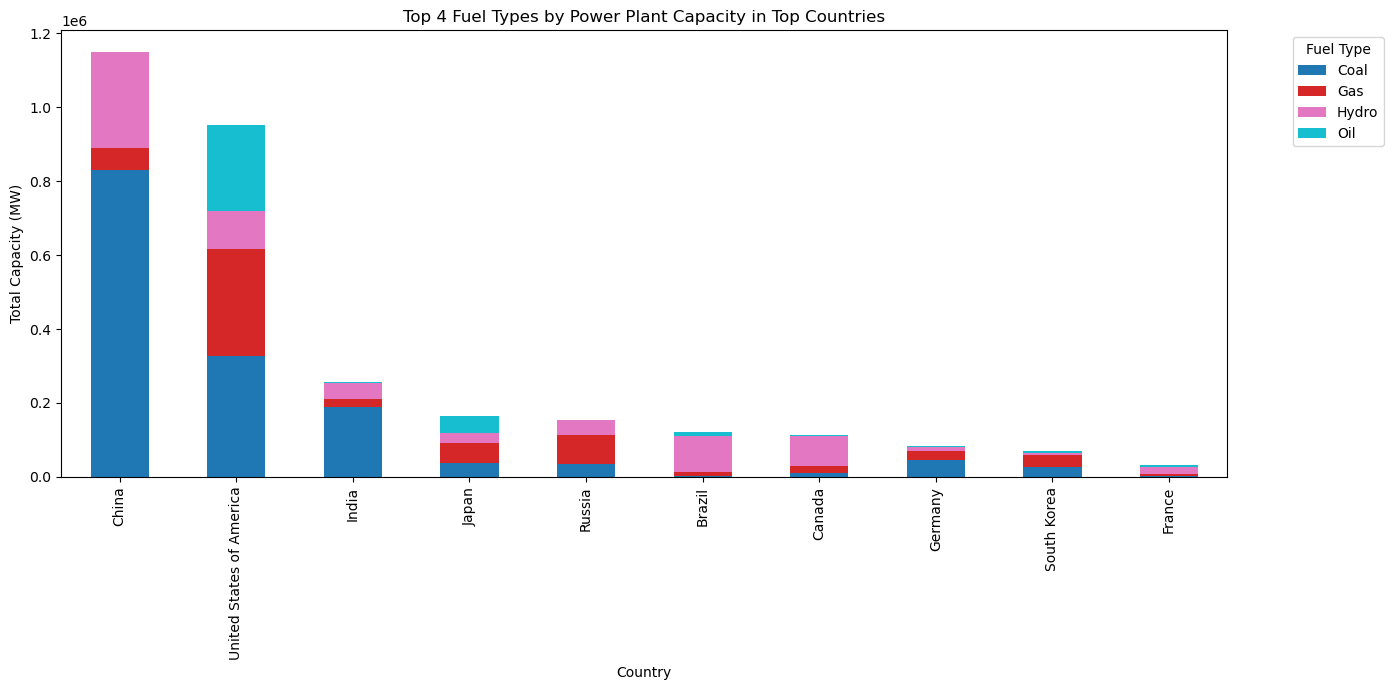

In [14]:
fuel_capacity.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab10')
plt.title("Top 4 Fuel Types by Power Plant Capacity in Top Countries")
plt.xlabel("Country")
plt.ylabel("Total Capacity (MW)")
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
df['country_long'].nunique()

164

In [16]:
fuel_capacity


fuel1,Coal,Gas,Hydro,Oil
country_long,,,,
China,828602.000,60286.60000,259541.6000,1612.50000
United States of America,326973.400,290676.40000,100982.1000,232897.70000
India,188116.220,21922.35100,43250.2700,4521.38000
Japan,38940.000,53362.75000,27439.0000,45620.20000
Russia,36407.000,76019.50000,42370.5000,0.00000
Brazil,2792.881,11286.00446,98039.3839,8281.47074
Canada,9772.000,19786.40000,80683.0000,2344.00000
Germany,47039.900,24430.25000,9984.1000,2851.20000
South Korea,27078.000,31552.90000,6063.0600,4655.00000


In [17]:
fuel_capacity.loc['India']

fuel1
Coal     188116.220
Gas       21922.351
Hydro     43250.270
Oil        4521.380
Name: India, dtype: float64